In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
X=df.drop(columns=['math_score'],axis=1)

In [5]:
y=df['math_score']

In [6]:
num_feature=X.select_dtypes(exclude='object').columns

In [7]:
cat_feature=X.select_dtypes(include='object').columns

In [8]:
print(cat_feature,num_feature)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object') Index(['reading_score', 'writing_score'], dtype='object')


In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
oh_trasnsformer=OneHotEncoder()

preprocessor=ColumnTransformer(transformers=[('Standard_scaler',num_transformer,num_feature),('OneHotEncoder',oh_trasnsformer,cat_feature)],

                 remainder='passthrough'
                 )

In [10]:
X=preprocessor.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.31,random_state=42,)

In [12]:
X_train.shape,y_train.shape

((690, 19), (690,))

In [17]:
def evaluate_model(true,predicted):
    mae =mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r2score=r2_score(true,predicted)
    return mae,mse,r2score

In [21]:
models={'LinearRegression':LinearRegression(),
        'SVR':SVR(),
        'AdaBoostRegressor':AdaBoostRegressor(),
        'RandomForestRegressor':RandomForestRegressor(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'KNeighborsRegressor':KNeighborsRegressor(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        }

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train) #train model
    
    #make prediction
    y_pred=model.predict(X_test)
    
    
    mae,mse,r2score= evaluate_model(y_test,y_pred)
    
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance')
    
    print("-Mean Squared Error: {:.4f}".format(mse))
    print("- Mean Absolute Error: {:.4f}".format(mae))
    print("- R2 Score: {:.4f}".format(r2score))

    
    print('----------------------')
    r2_list.append(r2score)

LinearRegression
Model performance
-Mean Squared Error: 30.4694
- Mean Absolute Error: 4.3763
- R2 Score: 0.8769
----------------------
SVR
Model performance
-Mean Squared Error: 67.5642
- Mean Absolute Error: 5.7384
- R2 Score: 0.7271
----------------------
AdaBoostRegressor
Model performance
-Mean Squared Error: 40.2727
- Mean Absolute Error: 4.9690
- R2 Score: 0.8373
----------------------
RandomForestRegressor
Model performance
-Mean Squared Error: 37.9259
- Mean Absolute Error: 4.8196
- R2 Score: 0.8468
----------------------
DecisionTreeRegressor
Model performance
-Mean Squared Error: 71.8516
- Mean Absolute Error: 6.7548
- R2 Score: 0.7097
----------------------
KNeighborsRegressor
Model performance
-Mean Squared Error: 55.5978
- Mean Absolute Error: 5.7710
- R2 Score: 0.7754
----------------------
Lasso
Model performance
-Mean Squared Error: 47.4056
- Mean Absolute Error: 5.4132
- R2 Score: 0.8085
----------------------
Ridge
Model performance
-Mean Squared Error: 30.4661
- Mea

In [39]:
# Corrected code
pd.DataFrame(data=list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by='R2_Score', ascending=False)

,Model Name,R2_Score
7,Ridge,0.876927
0,LinearRegression,0.876914
3,RandomForestRegressor,0.846792
2,AdaBoostRegressor,0.837312
6,Lasso,0.808497
5,KNeighborsRegressor,0.775403
1,SVR,0.727063
4,DecisionTreeRegressor,0.709743


In [41]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
 = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.69


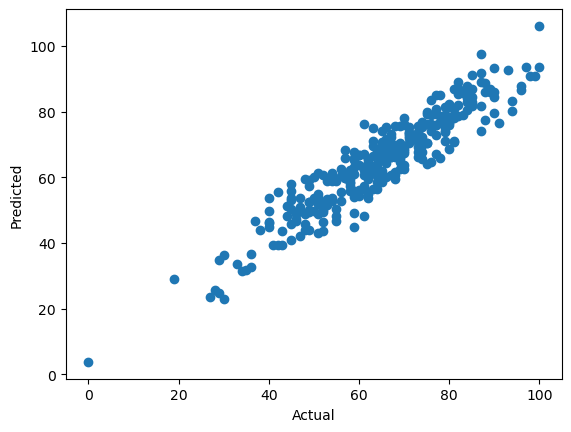

In [49]:
plt.scatter(y_test,y_pred,)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math_score'>

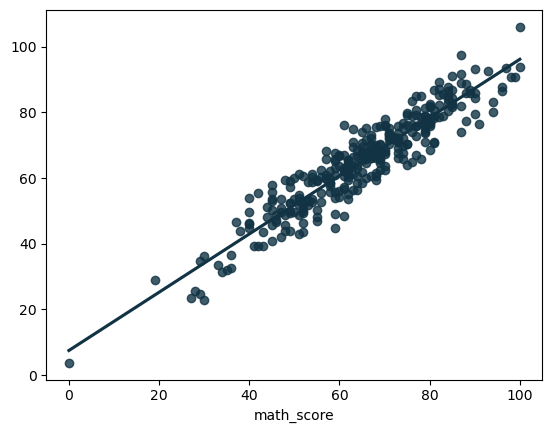

In [61]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='#134A')

In [63]:
pd.DataFrame({'Actual_values':y_test,'Predicted values':y_pred,"Difference":y_test-y_pred})

,Actual_values,Predicted values,Difference
521,91,76.454255,14.545745
737,53,58.932700,-5.932700
740,80,76.909683,3.090317
660,74,76.907372,-2.907372
411,84,87.652405,-3.652405
...,...,...,...
949,57,65.763938,-8.763938
334,83,85.552089,-2.552089
576,61,56.537734,4.462266
934,98,90.866960,7.133040
